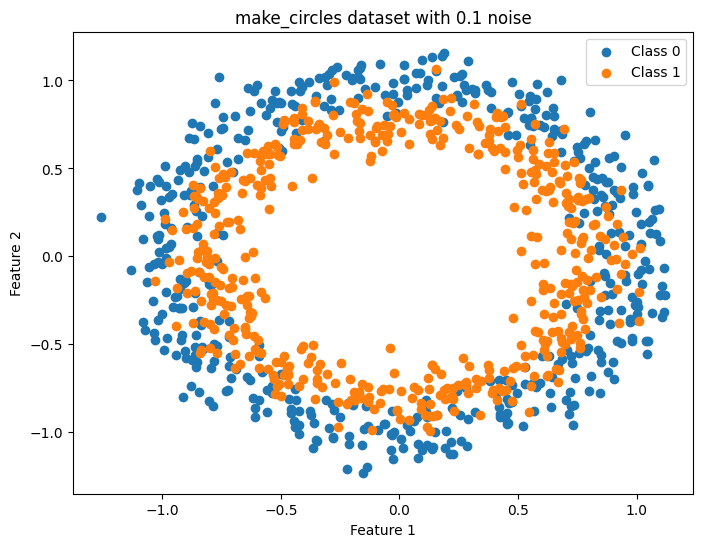

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate a dataset using make_circles
X, y = make_circles(n_samples=1000, noise=0.1,random_state=42)

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_circles dataset with 0.1 noise')
plt.legend()
plt.show()


In [55]:
# Convert to pandas DataFrame for better readability (if needed)
import pandas as pd
import numpy as np
# Convert to pandas DataFrame for better readability
df = pd.DataFrame(np.c_[X, y], columns=['Feature 1', 'Feature 2', 'Target'])

# Display the basic features
print("Shape of feature matrix X:", X.shape)
print("Shape of target vector y:", y.shape)
print("\nFirst 5 rows of the dataset:\n")
print(df.head())

# Display some basic statistics of the dataset
print("\nBasic statistics of the dataset:\n")
print(df.describe())

Shape of feature matrix X: (1000, 2)
Shape of target vector y: (1000,)

First 5 rows of the dataset:

   Feature 1  Feature 2  Target
0   0.712108   0.284698     1.0
1  -0.678716   0.207274     1.0
2  -0.866026   0.343651     1.0
3  -0.517648   0.620599     1.0
4   0.454089  -0.890466     0.0

Basic statistics of the dataset:

         Feature 1    Feature 2      Target
count  1000.000000  1000.000000  1000.00000
mean     -0.001493    -0.002680     0.50000
std       0.643615     0.647395     0.50025
min      -1.257779    -1.230499     0.00000
25%      -0.599500    -0.612830     0.00000
50%       0.006490    -0.019458     0.50000
75%       0.608745     0.605026     1.00000
max       1.118057     1.157938     1.00000


In [56]:
# Using numpy to find unique targets and their counts
unique_targets, counts = np.unique(y, return_counts=True)
print("Using numpy:")
print("Unique target values:", unique_targets)
print("Counts of each target value:", counts)

# Using pandas to find unique targets and their counts
target_series = pd.Series(y)
target_counts = target_series.value_counts()
print("\nUsing pandas:")
print("Unique target values and their counts:\n", target_counts)



Using numpy:
Unique target values: [0 1]
Counts of each target value: [500 500]

Using pandas:
Unique target values and their counts:
 1    500
0    500
Name: count, dtype: int64


In [57]:
dir(make_circles)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Validation Set Evaluation:
Accuracy: 0.51
Precision: 0.48
Recall: 0.53
F1-score: 0.51

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       106
           1       0.48      0.53      0.51        94

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200

Validation Set Confusion Matrix:
[[52 54]
 [44 50]]


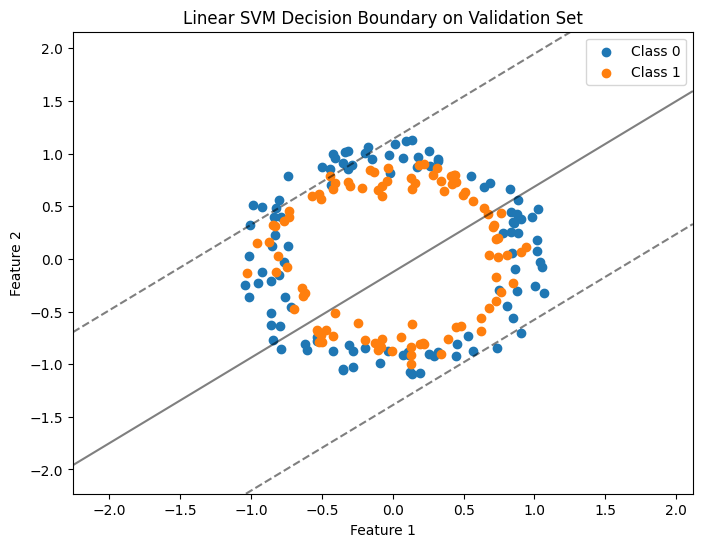

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Split the data into training and temp sets (60% training, 40% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temp set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a Linear SVM classifier on the training data
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = linear_svm.predict(X_val)

# Evaluate the classifier on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print('Validation Set Evaluation:')
print(f'Accuracy: {val_accuracy:.2f}')
print(f'Precision: {val_precision:.2f}')
print(f'Recall: {val_recall:.2f}')
print(f'F1-score: {val_f1:.2f}')

print('\nValidation Set Classification Report:')
print(classification_report(y_val, y_val_pred))

print('Validation Set Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))

# Plot the decision boundary for the validation set
plt.figure(figsize=(8, 6))
plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], label='Class 0')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary on Validation Set')
plt.legend()

# Create a grid to plot decision boundaries
import numpy as np

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

# Predict the function value for the whole grid
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()


In [58]:
from sklearn.model_selection import train_test_split



# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Optional: Convert to pandas DataFrame for better readability (if needed)
df_train = pd.DataFrame(np.c_[X_train, y_train], columns=['Feature 1', 'Feature 2', 'Target'])
df_val = pd.DataFrame(np.c_[X_val, y_val], columns=['Feature 1', 'Feature 2', 'Target'])
df_test = pd.DataFrame(np.c_[X_test, y_test], columns=['Feature 1', 'Feature 2', 'Target'])

print("\nFirst 5 rows of the training dataset:\n", df_train.head())
print("\nFirst 5 rows of the validation dataset:\n", df_val.head())
print("\nFirst 5 rows of the test dataset:\n", df_test.head())

Training set shape: (600, 2) (600,)
Validation set shape: (200, 2) (200,)
Test set shape: (200, 2) (200,)

First 5 rows of the training dataset:
    Feature 1  Feature 2  Target
0  -0.985446   0.400054     0.0
1   0.458204  -0.945958     0.0
2   0.786797  -0.539563     0.0
3   0.591862   0.748363     0.0
4   0.931792  -0.098654     1.0

First 5 rows of the validation dataset:
    Feature 1  Feature 2  Target
0  -0.529533  -0.696937     1.0
1  -0.948021  -0.228773     0.0
2   0.679210  -0.466598     1.0
3  -0.768317  -0.028700     0.0
4  -0.616406  -0.807496     0.0

First 5 rows of the test dataset:
    Feature 1  Feature 2  Target
0   0.899522  -0.602067     0.0
1  -0.120255   0.570722     1.0
2   0.090850  -0.834752     1.0
3  -0.611741   0.585586     1.0
4   0.286767  -0.776514     1.0


In [43]:
from matplotlib.colors import ListedColormap

# Define a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh

    # Create a mesh grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightcoral', 'lightblue']), alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary of SVM Classifier with Kernel')
    plt.show()

In [65]:
def evaluate_and_plot_svm(clf, X_train, y_train, X_val, y_val, kernel_name):
    # Fit the model
    clf.fit(X_train, y_train)

    print("Best Parameters:",clf.best_params_)

    # Predict on validation set
    y_val_pred = clf.predict(X_val)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f'{kernel_name} Kernel SVM:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report(y_val, y_val_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_val, y_val_pred))
    print('\n')

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], label='Class 0')
    plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{kernel_name} Kernel SVM Decision Boundary')
    plt.legend()

    # Create a grid to plot decision boundaries
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

    # Predict the function value for the whole grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.show()
    plot_decision_boundary(clf, X_val, y_val)



In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np


Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale'}
Polynomial Kernel SVM:
Accuracy: 0.80
Precision: 0.73
Recall: 0.90
F1-score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       106
           1       0.73      0.90      0.81        94

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200

Confusion Matrix:
[[74 32]
 [ 9 85]]




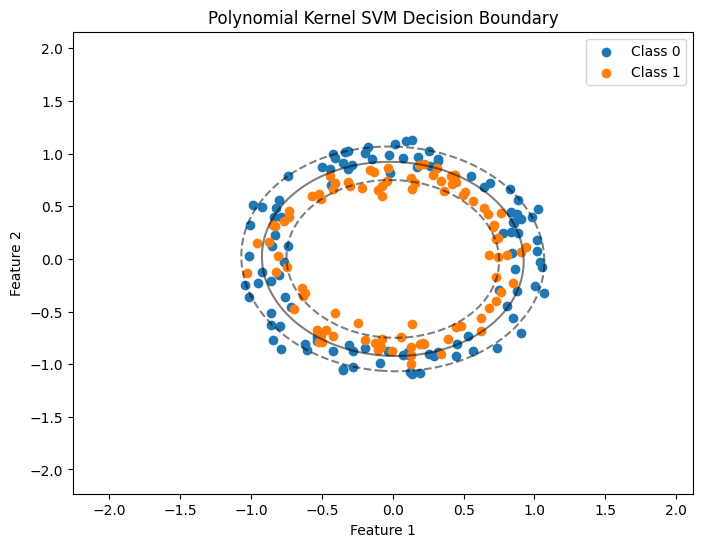

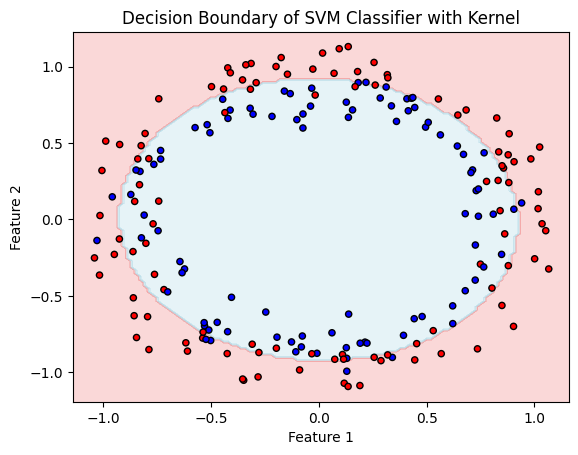

In [66]:
# Define the parameter grid for polynomial kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

# Create GridSearchCV object for polynomial kernel
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5, scoring='accuracy')
evaluate_and_plot_svm(grid_poly, X_train, y_train, X_val, y_val, 'Polynomial')


Best Parameters: {'C': 10, 'gamma': 0.1}
RBF Kernel SVM:
Accuracy: 0.81
Precision: 0.77
Recall: 0.84
F1-score: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       106
           1       0.77      0.84      0.80        94

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

Confusion Matrix:
[[82 24]
 [15 79]]




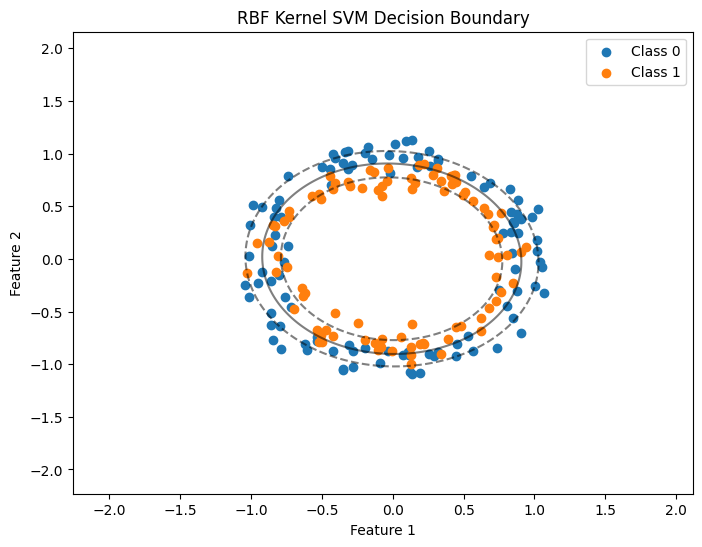

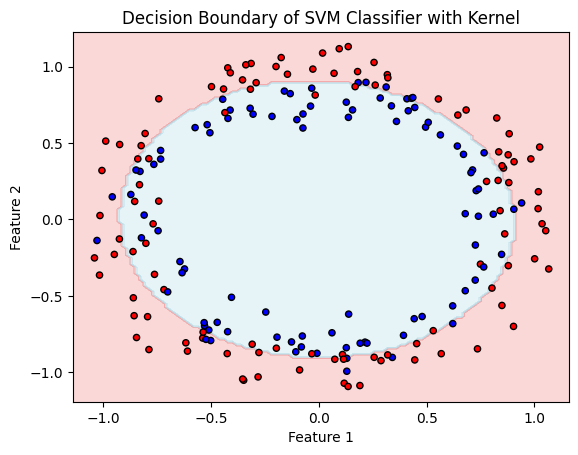

In [85]:
# Define the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

# Create GridSearchCV object for RBF kernel
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy')
evaluate_and_plot_svm(grid_rbf, X_train, y_train, X_val, y_val, 'RBF')


Best Parameters for Sigmoid Kernel: {'C': 1000, 'coef0': -3, 'gamma': 'scale'}
Best Accuracy Score for Sigmoid Kernel: 0.8633333333333333
Accuracy on Validation Set with Best Parameters: 0.805


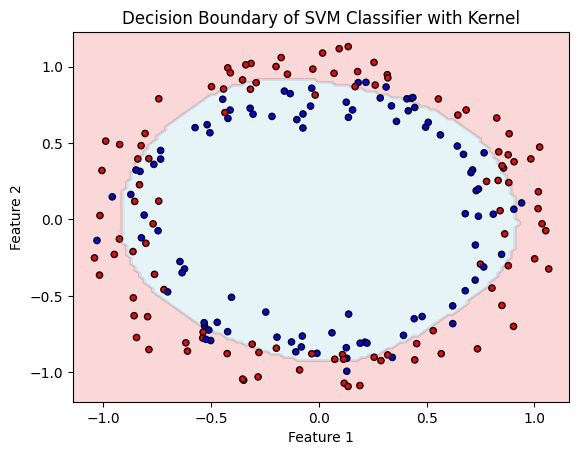

SIGMOID Kernel SVM:
Accuracy: 0.81
Precision: 0.77
Recall: 0.84
F1-score: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       106
           1       0.77      0.84      0.80        94

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

Confusion Matrix:
[[82 24]
 [15 79]]




In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the parameter grid for sigmoid kernel
param_grid_sigmoid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Widening the range of C values
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto'],  # Widening the range of gamma values
    'coef0': [-5, -3, -1, 0, 1, 3, 5]  # Adjusting the coef0 parameter
}

# Create GridSearchCV object for sigmoid kernel
grid_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), param_grid_sigmoid, cv=10, scoring='accuracy')

# Fit the grid search to the training data
grid_sigmoid.fit(X_train, y_train)

# Get the best parameters and best score
best_params_sigmoid = grid_sigmoid.best_params_
best_score_sigmoid = grid_sigmoid.best_score_


print("Best Parameters for Sigmoid Kernel:", best_params_sigmoid)
print("Best Accuracy Score for Sigmoid Kernel:", best_score_sigmoid)

# Evaluate the model with best parameters on the validation set
best_svm_sigmoid = grid_sigmoid.best_estimator_
y_val_pred_sigmoid = best_svm_sigmoid.predict(X_val)
accuracy_sigmoid = accuracy_score(y_val, y_val_pred_sigmoid)

print("Accuracy on Validation Set with Best Parameters:", accuracy_sigmoid)
plot_decision_boundary(best_svm_sigmoid, X_val, y_val)

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred_sigmoid)
precision = precision_score(y_val, y_val_pred_sigmoid)
recall = recall_score(y_val,y_val_pred_sigmoid)
f1 = f1_score(y_val, y_val_pred_sigmoid)
print(f'SIGMOID Kernel SVM:')
print(f'Accuracy: {accuracy_sigmoid:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_val, y_val_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))
print('\n')


Best Parameters: {'C': 1, 'gamma': 'scale'}
SIGMOID Kernel SVM:
Accuracy: 0.50
Precision: 0.47
Recall: 0.47
F1-score: 0.47

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       106
           1       0.47      0.47      0.47        94

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Confusion Matrix:
[[56 50]
 [50 44]]




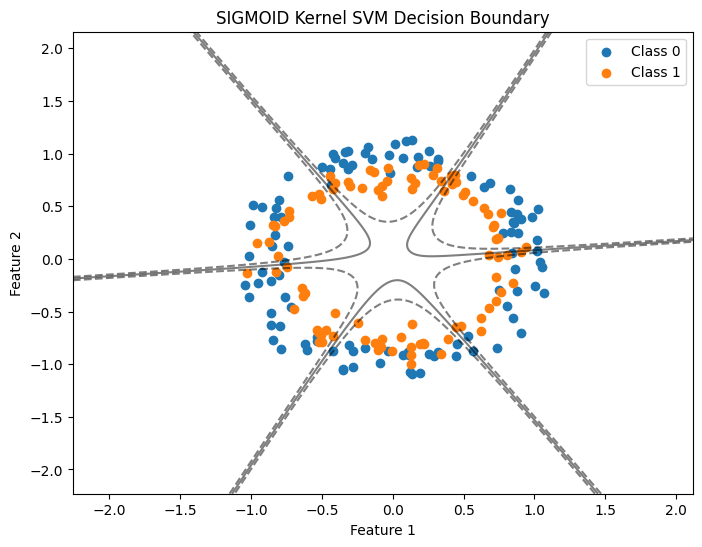

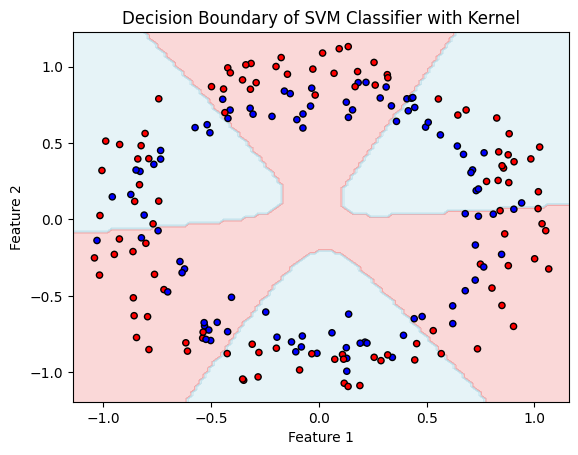

In [89]:
# Define the parameter grid for sigmoid kernel
param_grid_sigmoid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Widening the range of C values
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto'],  # Widening the range of gamma values
    'coef0': [-5, -3, -1, 0, 1, 3, 5]  # Adjusting the coef0 parameter
}

# Create GridSearchCV object for RBF kernel
grid_rbf = GridSearchCV(SVC(kernel='sigmoid'), param_grid_rbf, cv=5, scoring='accuracy')
evaluate_and_plot_svm(grid_rbf, X_train, y_train, X_val, y_val, 'SIGMOID')

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [37]:
def evaluate_logistic_regression_with_polynomial_features(X_train, y_train, X_val, y_val, degree):
    # Create a pipeline that adds polynomial features then applies logistic regression
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('logistic', LogisticRegression(max_iter=10000))
    ])

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f'Logistic Regression with Polynomial Features (degree={degree}):')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report(y_val, y_val_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_val, y_val_pred))
    print('\n')

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], label='Class 0')
    plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Logistic Regression with Polynomial Features (degree={degree}) Decision Boundary')
    plt.legend()

    # Create a grid to plot decision boundaries
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

    plt.show()


Logistic Regression with Polynomial Features (degree=2):
Accuracy: 0.81
Precision: 0.78
Recall: 0.85
F1-score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       106
           1       0.78      0.85      0.81        94

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

Confusion Matrix:
[[83 23]
 [14 80]]




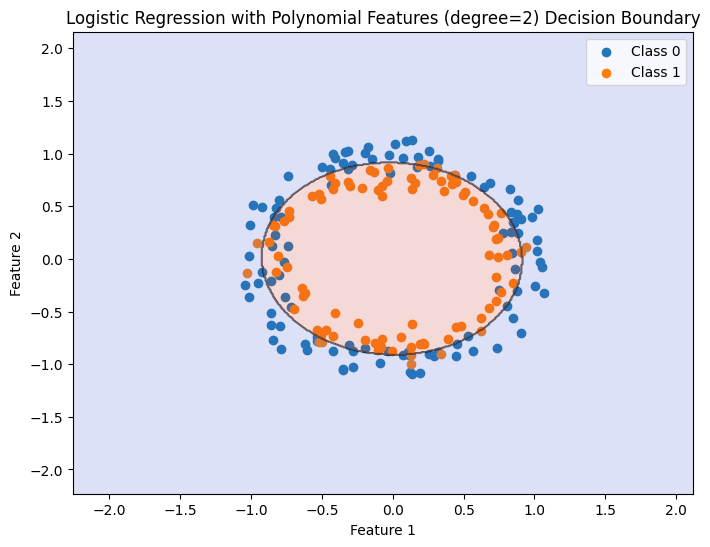

Logistic Regression with Polynomial Features (degree=3):
Accuracy: 0.81
Precision: 0.78
Recall: 0.85
F1-score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       106
           1       0.78      0.85      0.81        94

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

Confusion Matrix:
[[83 23]
 [14 80]]




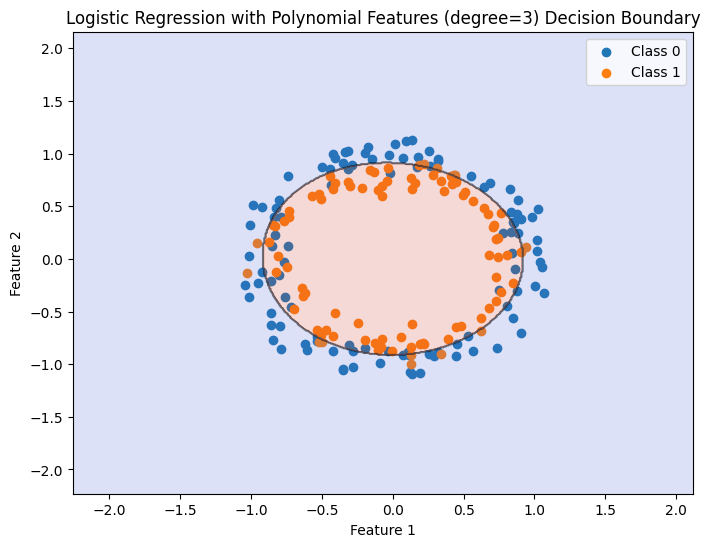

Logistic Regression with Polynomial Features (degree=4):
Accuracy: 0.81
Precision: 0.76
Recall: 0.85
F1-score: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       106
           1       0.76      0.85      0.80        94

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

Confusion Matrix:
[[81 25]
 [14 80]]




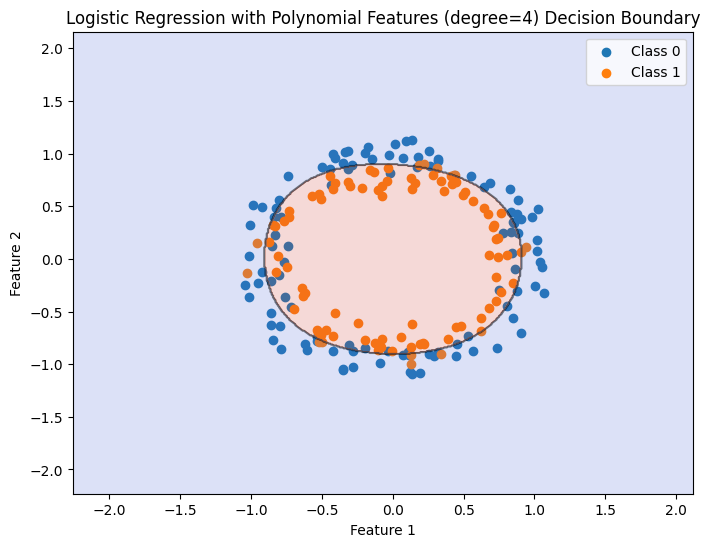

In [38]:
# Evaluate logistic regression with polynomial features of different degrees
for degree in [2, 3, 4]:
    evaluate_logistic_regression_with_polynomial_features(X_train, y_train, X_val, y_val, degree)


Polynomial Kernel SVM:
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1-score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       106
           1       0.98      1.00      0.99        94

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[104   2]
 [  0  94]]




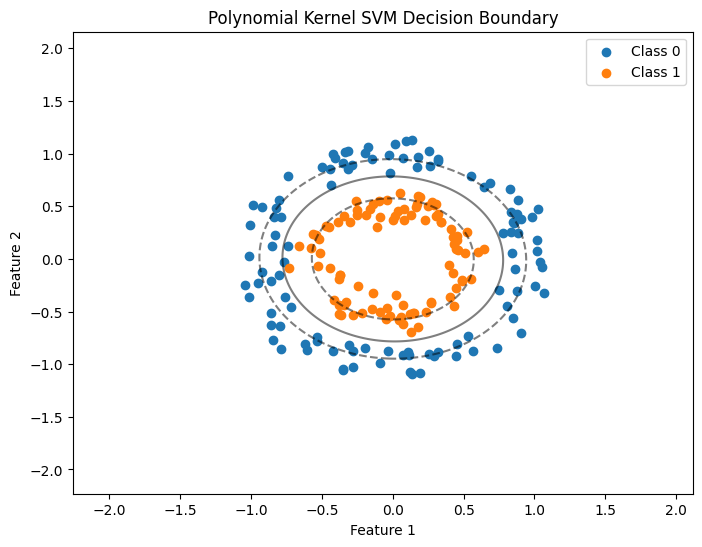

RBF Kernel SVM:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1-score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.99      1.00      0.99        94

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Confusion Matrix:
[[105   1]
 [  0  94]]




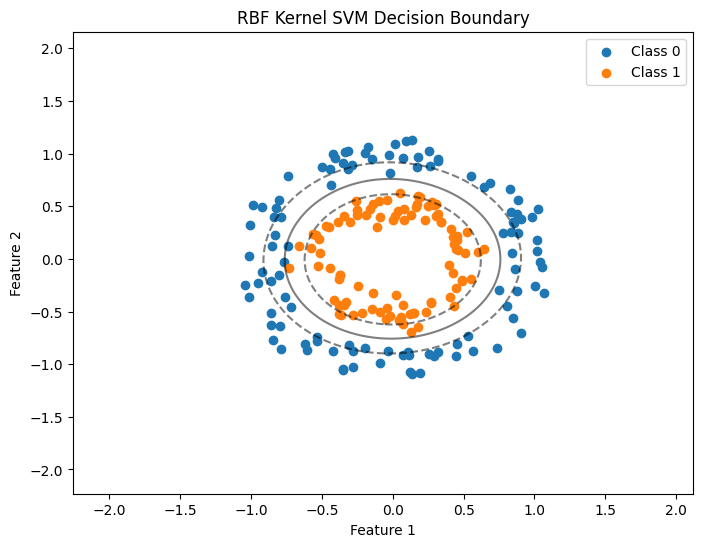

Logistic Regression with Polynomial Features (degree=2):
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1-score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       106
           1       0.98      1.00      0.99        94

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[104   2]
 [  0  94]]




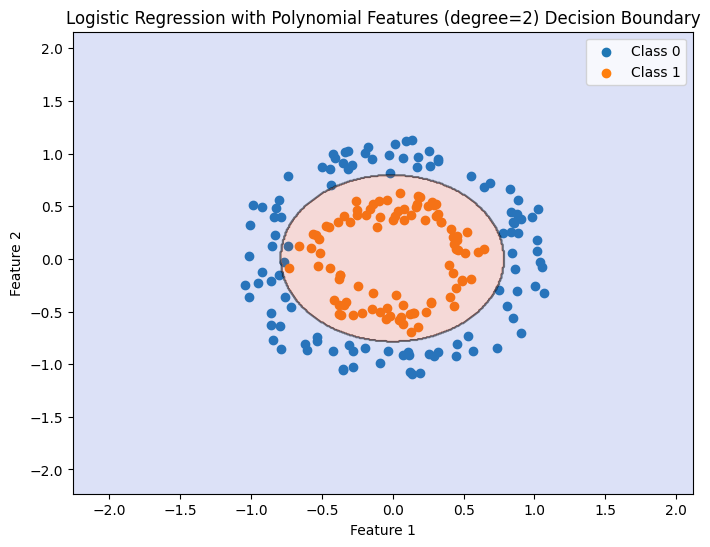

Logistic Regression with Polynomial Features (degree=3):
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1-score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       106
           1       0.98      1.00      0.99        94

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[104   2]
 [  0  94]]




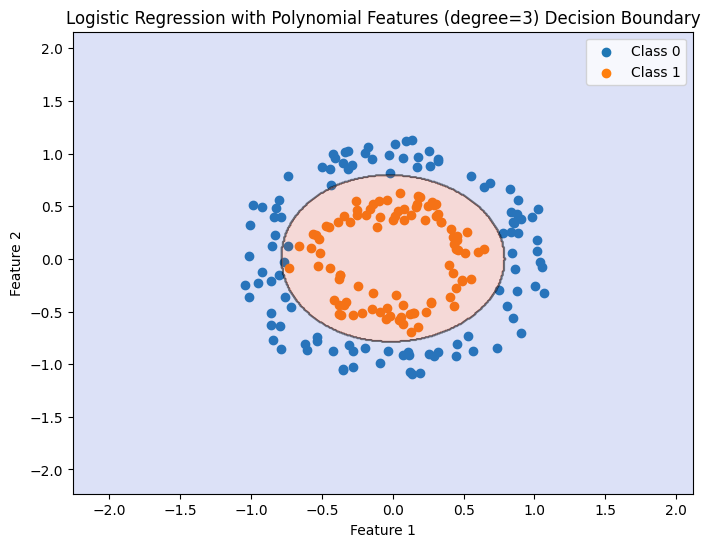

Logistic Regression with Polynomial Features (degree=4):
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1-score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       106
           1       0.98      1.00      0.99        94

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[104   2]
 [  0  94]]




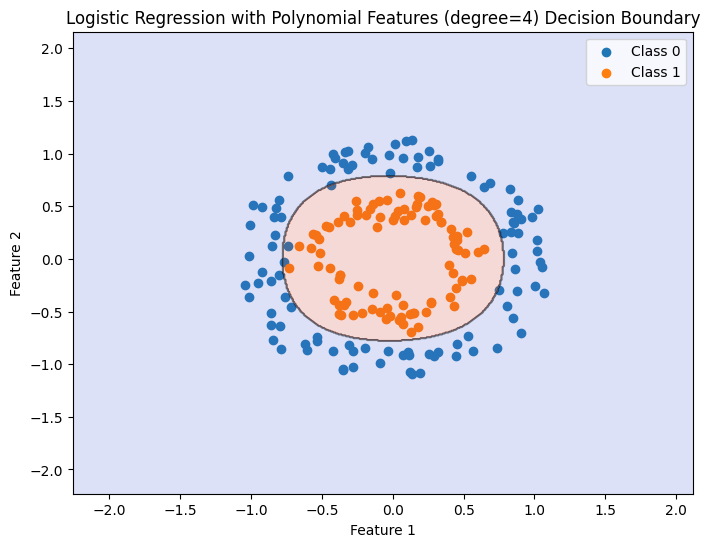

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

# Generate the dataset using make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def evaluate_and_plot_svm(clf, X_train, y_train, X_val, y_val, kernel_name):
    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = clf.predict(X_val)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f'{kernel_name} Kernel SVM:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report(y_val, y_val_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_val, y_val_pred))
    print('\n')

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], label='Class 0')
    plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{kernel_name} Kernel SVM Decision Boundary')
    plt.legend()

    # Create a grid to plot decision boundaries
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

    # Predict the function value for the whole grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.show()

# Define the parameter grid for polynomial kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

# Create GridSearchCV object for polynomial kernel
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5, scoring='accuracy')
evaluate_and_plot_svm(grid_poly, X_train, y_train, X_val, y_val, 'Polynomial')

# Define the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

# Create GridSearchCV object for RBF kernel
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy')
evaluate_and_plot_svm(grid_rbf, X_train, y_train, X_val, y_val, 'RBF')

def evaluate_logistic_regression_with_polynomial_features(X_train, y_train, X_val, y_val, degree):
    # Create a pipeline that adds polynomial features then applies logistic regression
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('logistic', LogisticRegression(max_iter=10000))
    ])

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f'Logistic Regression with Polynomial Features (degree={degree}):')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report(y_val, y_val_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_val, y_val_pred))
    print('\n')

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], label='Class 0')
    plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Logistic Regression with Polynomial Features (degree={degree}) Decision Boundary')
    plt.legend()

    # Create a grid to plot decision boundaries
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

    plt.show()

# Evaluate logistic regression with polynomial features of different degrees
for degree in [2, 3, 4]:
    evaluate_logistic_regression_with_polynomial_features(X_train, y_train, X_val, y_val, degree)


Optimal weight vector: [-0.3716284   0.57696333]
Optimal bias: 0.25386652044165897
Validation Set Evaluation:
Accuracy: 0.53
Precision: 0.50
Recall: 0.67
F1-score: 0.57

Validation Set Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.40      0.47       106
           1       0.50      0.67      0.57        94

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.52       200
weighted avg       0.54      0.53      0.52       200

Validation Set Confusion Matrix:
[[42 64]
 [31 63]]


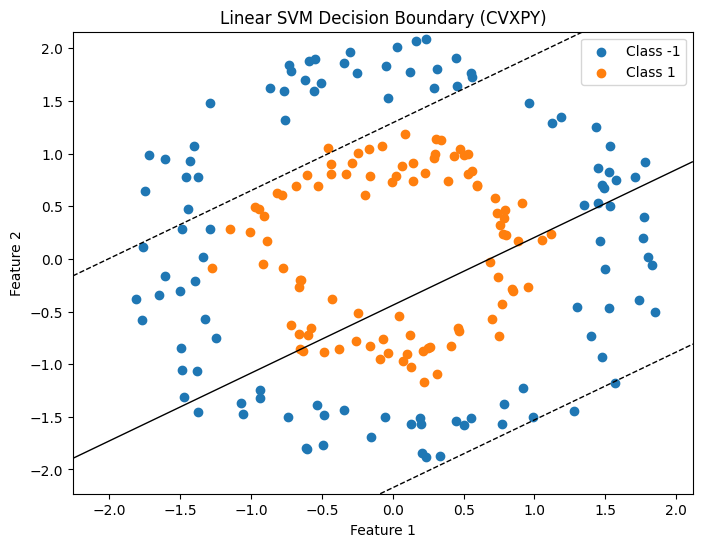

In [28]:
import cvxpy as cp
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate the dataset using make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Map labels from {0, 1} to {-1, 1}
y = np.where(y == 0, -1, 1)

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the SVM optimization problem
n, d = X_train.shape
C = 1.0  # Regularization parameter

# Define the variables
w = cp.Variable(d)
b = cp.Variable()
xi = cp.Variable(n)

# Define the constraints
constraints = [y_train[i] * (X_train[i] @ w + b) >= 1 - xi[i] for i in range(n)]
constraints += [xi >= 0]

# Define the objective function
objective = cp.Minimize(0.5 * cp.norm(w)**2 + C * cp.sum(xi))

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get the optimal values
w_opt = w.value
b_opt = b.value

print(f'Optimal weight vector: {w_opt}')
print(f'Optimal bias: {b_opt}')

# Evaluate the performance on the validation set
y_val_pred = np.sign(X_val @ w_opt + b_opt)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print('Validation Set Evaluation:')
print(f'Accuracy: {val_accuracy:.2f}')
print(f'Precision: {val_precision:.2f}')
print(f'Recall: {val_recall:.2f}')
print(f'F1-score: {val_f1:.2f}')

print('\nValidation Set Classification Report:')
print(classification_report(y_val, y_val_pred))

print('Validation Set Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))

# Plot decision boundary
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_val[y_val == -1][:, 0], X_val[y_val == -1][:, 1], label='Class -1')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary (CVXPY)')
plt.legend()

# Create a grid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

# Predict the function value for the whole grid
Z = (np.c_[xx.ravel(), yy.ravel()] @ w_opt + b_opt)
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=1)
plt.contour(xx, yy, Z, levels=[-1, 1], colors='k', linestyles=['--', '--'], linewidths=1)
plt.show()
